In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Library

In [ ]:
#!pip install --upgrade pip
#!pip install --upgrade jupyter notebook
!pip install pyLDAvis

In [ ]:
#!pip install numpy==1.21.1
#!pip install gensim==4.1.2


In [ ]:
from gensim.utils import simple_preprocess
import gensim
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pyLDAvis.gensim_models as gensimvis
from gensim.models import CoherenceModel
import pyLDAvis
from nltk import ngrams
import spacy
import gensim.corpora as corpora
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
import re
import os
import pickle
import numpy as np
import tqdm
from matplotlib import pyplot as plt
from itertools import chain

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Load Data

In [ ]:
import pandas as pd
#df = pd.read_csv('/content/drive/MyDrive/TM/Text mining project/dati_TM.csv')
df = pd.read_csv('/content/drive/MyDrive/dati_TM.csv')
df

id  \
0      c93a25175d42553bd05e8a61bae35abb23368d05   
1      8090057ca58ec0c7a752f0ac4fdd74954e5a6aa5   
2      7ba3aa10fa2d1623ac68cdd1bf2f3fde94a6e860   
3      b1bf2c63663503ca0951a08dc84cd97a593d857d   
4      c5cd24a690fb6e97f836a72cd36277bbdc172aca   
...                                         ...   
19995  6fed72ab21be074d97044064ed7e061c900782a5   
19996  6254310ef2b3da876a0defef6a97c4a7254275de   
19997  556da577a560ad490be15aff9f8a62cd78bb5ef2   
19998  d4828cc9127df32c221d9ef8cef897fa86e760d0   
19999  ff2239f90b58f6629b9b861848d0ff2ee7fe956d   

                                                 article  \
0      Bucharest, Romania (CNN) -- Romania's leftist ...   
1      LONDON, England (CNN) -- London's newest hotel...   
2      Los Angeles (CNN) -- Actress Lindsay Lohan sho...   
3      By . Associated Press . PUBLISHED: . 11:30 EST...   
4      (CNN) -- Finally, fans of the world's most fam...   
...                                                  ...   
19995  It might sound, well, a bit bananas, but makin...   
19996  Stop judging the California woman who walked a...   
19997  By . John Mcgarry . Southampton have sounded o...   
19998  Four American women of Chinese descent are sui...   
19999  By . James Nye . PUBLISHED: . 14:27 EST, 30 Au...   

                                              highlights  
0      Leftist government files a motion with parliam...  
1      Entrepreneur braves recession to open rock'n'r...  
2      Lohan could have waited until June 17 to start...  
3      Gunman killed 20 first-graders and six teachin...  
4      'Harry Potter' books finally come to Kindle, N...  
...                                                  ...  
19995  Green banana flour could be a healthier way to...  
19996  A photo purports to show the woman with her mo...  
19997  Southampton keen on recruiting former Brighton...  
19998  Four customers are suing Sephora for allegedly...  
19999  Teenager in Gig Harbor, Washington, was grabbe...  

[20000 rows x 3 columns]

#Pre-Procesing



*   Remove punctuation
*   Convert to lowercase
*   Remove stopwords
*   N-gram
*   Lemmatization






In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

###Remove punctuation

In [ ]:
df['article'] = \
df['article'].map(lambda x: re.sub('[,\.!?]', '', x))

###Convert the titles to lowercase

In [ ]:
df['article'] = \
df['article'].map(lambda x: x.lower())

###Remove stopwords

In [ ]:
stop_words = stopwords.words('english')
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]
data = df["article"].values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)

# N-grams

In [ ]:
#LEMMATIZATION FUNCTION
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

## Unigram model

###Lemmatization

In [ ]:
# Do lemmatization keeping only noun, adj, vb, adv
data_uni_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

###corpus

In [ ]:
# Create Dictionary
id2word_uni = corpora.Dictionary(data_uni_lemmatized)
id2word_uni.filter_extremes(no_below=50, no_above=0.8,keep_n=100000)
# filter words that occurs in less than 50 documents and words that occurs in more than 80% of total documents
# keep top 100000 frequent words


# Term Document Frequency
corpus_uni = [id2word_uni.doc2bow(t) for t in data_uni_lemmatized]

## Bigram model

In [ ]:
# Build the bigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
# Faster way to get a sentence clubbed as a bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

###Lemmatization

In [ ]:
# Do lemmatization keeping only noun, adj, vb, adv
data_bi_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

### corpus

In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word_bi = corpora.Dictionary(data_bi_lemmatized)
id2word_bi.filter_extremes(no_below=50, no_above=0.8,keep_n=100000)
# filter words that occurs in less than 50 documents and words that occurs in more than 80% of total documents
# keep top 100000 frequent words


# Term Document Frequency
corpus_bi = [id2word_bi.doc2bow(t) for t in data_bi_lemmatized]

## Trigram model

In [ ]:
# Build the bigram models
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a bigram
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Form Bigrams
data_words_trigram = make_trigrams(data_words)

###Lemmatization

In [ ]:
# Do lemmatization keeping only noun, adj, vb, adv
data_tri_lemmatized = lemmatization(data_words_trigram, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

###corpus

In [ ]:
# Create Dictionary
id2word_tri = corpora.Dictionary(data_tri_lemmatized)
id2word_tri.filter_extremes(no_below=50, no_above=0.8,keep_n=100000)
# filter words that occurs in less than 50 documents and words that occurs in more than 80% of total documents
# keep top 100000 frequent words

# Term Document Frequency
corpus_tri = [id2word_tri.doc2bow(text) for text in data_tri_lemmatized]

##SAVE

corpus and dictionary

In [ ]:
with open('/content/drive/MyDrive/Text mining project/Topic modeling/Final_results/id2word_uni.pkl', 'wb') as f:
    pickle.dump(id2word_uni, f)

with open('/content/drive/MyDrive/Text mining project/Topic modeling/Final_results/corpus_uni.pkl', 'wb') as file:
    pickle.dump(corpus_uni, file)

In [ ]:
with open('/content/drive/MyDrive/Text mining project/Topic modeling/Final_results/id2word_bi.pkl', 'wb') as f:
    pickle.dump(id2word_bi, f)

with open('/content/drive/MyDrive/Text mining project/Topic modeling/Final_results/corpus_bi.pkl', 'wb') as file:
    pickle.dump(corpus_bi, file)

In [ ]:
with open('/content/drive/MyDrive/Text mining project/Topic modeling/Final_results/id2word_tri.pkl', 'wb') as f:
    pickle.dump(id2word_tri, f)

with open('/content/drive/MyDrive/Text mining project/Topic modeling/Final_results/corpus_tri.pkl', 'wb') as file:
    pickle.dump(corpus_tri, file)

#Topic Modeling

corpus and dictionary

In [ ]:
with open('/content/drive/MyDrive/TM/Text mining project/Topic modeling/Final_results/id2word_uni.pkl', 'rb') as file:
    id2word_uni = pickle.load(file)
with open('/content/drive/MyDrive/TM/Text mining project/Topic modeling/Final_results/corpus_uni.pkl', 'rb') as file:
    corpus_uni = pickle.load(file)

with open('/content/drive/MyDrive/TM/Text mining project/Topic modeling/Final_results/id2word_bi.pkl', 'rb') as file:
    id2word_bi = pickle.load(file)
with open('/content/drive/MyDrive/TM/Text mining project/Topic modeling/Final_results/corpus_bi.pkl', 'rb') as file:
    corpus_bi = pickle.load(file)

with open('/content/drive/MyDrive/TM/Text mining project/Topic modeling/Final_results/id2word_tri.pkl', 'rb') as file:
    id2word_tri = pickle.load(file)
with open('/content/drive/MyDrive/TM/Text mining project/Topic modeling/Final_results/corpus_tri.pkl', 'rb') as file:
    corpus_tri = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Train and Test

It is assigned 90% to train and 10% to test

In [ ]:
corpus_uni_traval, corpus_uni_test = train_test_split(corpus_uni, train_size=0.9, test_size=0.1, random_state=777)
corpus_uni_train, corpus_uni_val = train_test_split(corpus_uni_traval, train_size=0.7, test_size=0.3, random_state=777)

corpus_bi_traval, corpus_bi_test = train_test_split(corpus_bi, train_size=0.9, test_size=0.1, random_state=777)
corpus_bi_train, corpus_bi_val = train_test_split(corpus_bi_traval, train_size=0.7, test_size=0.3, random_state=777)

corpus_tri_traval, corpus_tri_test = train_test_split(corpus_tri, train_size=0.9, test_size=0.1, random_state=777)
corpus_tri_train, corpus_tri_val = train_test_split(corpus_tri_traval, train_size=0.7, test_size=0.3, random_state=777)

## HyperParameter parte 1

Searching for the best alpha and beta paralmeters with unigram, bigram, trigram. Observing the results with 5, 10, 20, 50, 100 mtopics.

In [ ]:
# supporting function
def compute_perplexity(corpus_train, corpus_test, dictionary, k, a, b):
    lda_model = gensim.models.LdaMulticore(corpus=corpus_train,
                                           id2word=dictionary,
                                           num_topics=k,
                                           random_state=777,
                                           alpha=a,
                                           eta=b)
    perplexity=lda_model.log_perplexity(corpus_test)
    return perplexity

### Unigram

In [ ]:
# Topics range
topics_range = [5, 10, 20, 50, 100]

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')


model_results_uni = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Perplexity': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)))

    # iterate through number of topics
    for k in topics_range:
        # iterate through alpha values
        for a in alpha:
            # iterare through beta values
            for b in beta:
                # get the coherence score for the given parameters
                perplexity = compute_perplexity(corpus_train=corpus_uni_train, corpus_test = corpus_uni_val,
                                                dictionary=id2word_uni, k=k, a=a, b=b)
                # Save the model results
                model_results_uni['Topics'].append(k)
                model_results_uni['Alpha'].append(a)
                model_results_uni['Beta'].append(b)
                model_results_uni['Perplexity'].append(perplexity)

                pbar.update(1)
    pd.DataFrame(model_results_uni).to_csv('/content/drive/MyDrive/Text mining project/Topic modeling/Final_results/result_uni', index=False)
    pbar.close()

#### Analysis unigram

Comparison of results to determine the best

In [ ]:
results_uni = pd.read_csv('/content/drive/MyDrive/TM/Text mining project/Topic modeling/Final_results/result_uni')

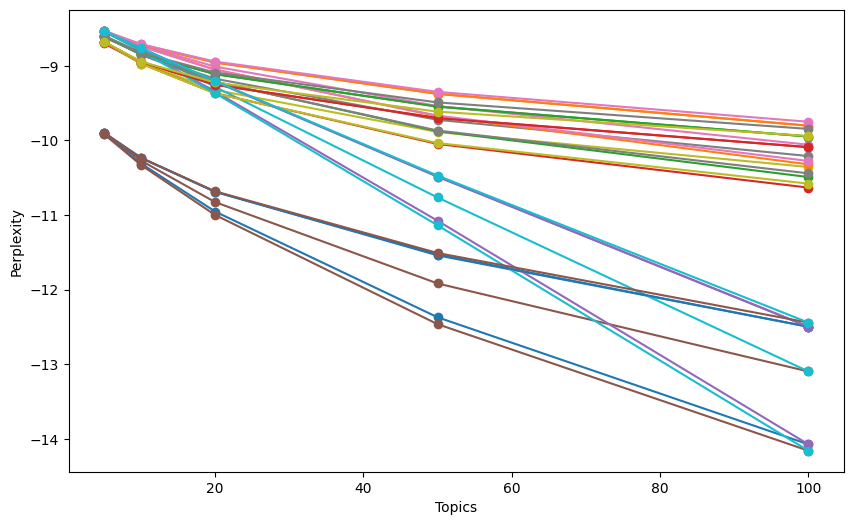

In [ ]:
alphas = ['0.01', '0.31', '0.61', '0.9099999999999999', 'symmetric', 'asymmetric']
betas = ['0.01', '0.31', '0.61', '0.9099999999999999', 'symmetric']
alpha_beta_values = [(alpha, beta) for alpha in alphas for beta in betas]

plt.figure(figsize=(10, 6))

for alpha, beta in alpha_beta_values:
    subset = results_uni[(results_uni['Alpha'] == alpha) & (results_uni['Beta'] == beta)]
    plt.plot(subset['Topics'], subset['Perplexity'], label=f'Alpha={alpha}, Beta={beta}', marker='o')

# Set labels and title
plt.xlabel('Topics')
plt.ylabel('Perplexity')

plt.show()

In [ ]:
perplexity_sums_dict = {}

for alpha, beta in alpha_beta_values:
    subset = results_uni[(results_uni['Alpha'] == alpha) & (results_uni['Beta'] == beta)]
    perplexity_sum = subset['Perplexity'].sum()
    key = [alpha, beta]
    perplexity_sums_dict[tuple(key)] = perplexity_sum

In [ ]:
min_key = min(perplexity_sums_dict, key=lambda k: perplexity_sums_dict[k])
max_perplexity_sum = perplexity_sums_dict[min_key]
print(f'Minimum Perplexity Sum: {max_perplexity_sum} for Alpha={min_key[0]}, Beta={min_key[1]}')

Minimum Perplexity Sum: -57.86970135087646 for Alpha=0.9099999999999999, Beta=0.01


In [ ]:
best_uni = results_uni[(results_uni['Alpha'] == min_key[0]) & (results_uni['Beta'] == min_key[1])]

### Bigram

In [ ]:
# Topics range
topics_range = [5, 10, 20, 50, 100]

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')


model_results_bi = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Perplexity': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)))

    # iterate through number of topics
    for k in topics_range:
        # iterate through alpha values
        for a in alpha:
            # iterare through beta values
            for b in beta:
                # get the coherence score for the given parameters
                perplexity = compute_perplexity(corpus_train=corpus_bi_train, corpus_test = corpus_bi_val,
                                                dictionary=id2word_bi, k=k, a=a, b=b)
                # Save the model results
                model_results_bi['Topics'].append(k)
                model_results_bi['Alpha'].append(a)
                model_results_bi['Beta'].append(b)
                model_results_bi['Perplexity'].append(perplexity)

                pbar.update(1)
    pd.DataFrame(model_results_bi).to_csv('/content/drive/MyDrive/Text mining project/Topic modeling/Final_results/result_bi', index=False)
    pbar.close()

#### Analysis bigram

Comparison of results to determine the best

In [ ]:
results_bi = pd.read_csv('/content/drive/MyDrive/TM/Text mining project/Topic modeling/Final_results/result_bi')

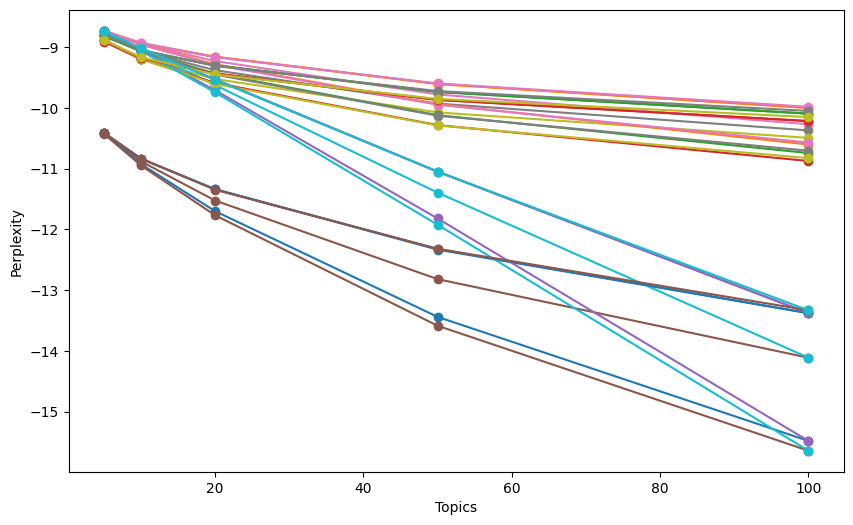

In [ ]:
alphas = ['0.01', '0.31', '0.61', '0.9099999999999999', 'symmetric', 'asymmetric']
betas = ['0.01', '0.31', '0.61', '0.9099999999999999', 'symmetric']
alpha_beta_values = [(alpha, beta) for alpha in alphas for beta in betas]

plt.figure(figsize=(10, 6))

for alpha, beta in alpha_beta_values:
    subset = results_bi[(results_bi['Alpha'] == alpha) & (results_bi['Beta'] == beta)]
    plt.plot(subset['Topics'], subset['Perplexity'], label=f'Alpha={alpha}, Beta={beta}', marker='o')

# Set labels and title
plt.xlabel('Topics')
plt.ylabel('Perplexity')

plt.show()

In [ ]:
perplexity_sums_dict = {}

for alpha, beta in alpha_beta_values:
    subset = results_bi[(results_bi['Alpha'] == alpha) & (results_bi['Beta'] == beta)]
    perplexity_sum = subset['Perplexity'].sum()
    key = [alpha, beta]
    perplexity_sums_dict[tuple(key)] = perplexity_sum

In [ ]:
min_key = min(perplexity_sums_dict, key=lambda k: perplexity_sums_dict[k])
max_perplexity_sum = perplexity_sums_dict[min_key]
print(f'Minimum Perplexity Sum: {max_perplexity_sum} for Alpha={min_key[0]}, Beta={min_key[1]}')

Minimum Perplexity Sum: -62.37092122250591 for Alpha=0.9099999999999999, Beta=0.01


In [ ]:
best_bi = results_bi[(results_bi['Alpha'] == min_key[0]) & (results_bi['Beta'] == min_key[1])]

### Trigram

In [ ]:
# Topics range
topics_range = [5, 10, 20, 50, 100]

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')


model_results_tri = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Perplexity': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)))

    # iterate through number of topics
    for k in topics_range:
        # iterate through alpha values
        for a in alpha:
            # iterare through beta values
            for b in beta:
                # get the coherence score for the given parameters
                compute_perplexity(corpus_train=corpus_tri_train, corpus_test = corpus_tri_val,
                                                dictionary=id2word_bi, k=k, a=a, b=b)
                # Save the model results
                model_results_tri['Topics'].append(k)
                model_results_tri['Alpha'].append(a)
                model_results_tri['Beta'].append(b)
                model_results_tri['Perplexity'].append(perplexity)

                pbar.update(1)
    pd.DataFrame(model_results_tri).to_csv('/content/drive/MyDrive/Text mining project/Topic modeling/Final_results/result_tri', index=False)
    pbar.close()

#### Analysis bigram

Comparison of results to determine the best

In [ ]:
results_tri = pd.read_csv('/content/drive/MyDrive/TM/Text mining project/Topic modeling/Final_results/result_tri')

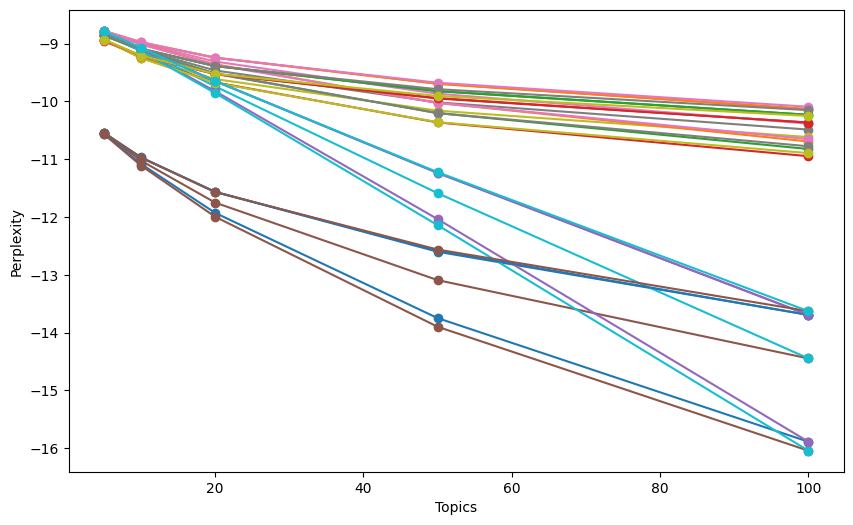

In [ ]:
alphas = ['0.01', '0.31', '0.61', '0.9099999999999999', 'symmetric', 'asymmetric']
betas = ['0.01', '0.31', '0.61', '0.9099999999999999', 'symmetric']
alpha_beta_values = [(alpha, beta) for alpha in alphas for beta in betas]

plt.figure(figsize=(10, 6))

for alpha, beta in alpha_beta_values:
    subset = results_tri[(results_tri['Alpha'] == alpha) & (results_tri['Beta'] == beta)]
    plt.plot(subset['Topics'], subset['Perplexity'], label=f'Alpha={alpha}, Beta={beta}', marker='o')

# Set labels and title
plt.xlabel('Topics')
plt.ylabel('Perplexity')

plt.show()

In [ ]:
perplexity_sums_dict = {}

for alpha, beta in alpha_beta_values:
    subset = results_tri[(results_tri['Alpha'] == alpha) & (results_tri['Beta'] == beta)]
    perplexity_sum = subset['Perplexity'].sum()
    key = [alpha, beta]
    perplexity_sums_dict[tuple(key)] = perplexity_sum

In [ ]:
min_key = min(perplexity_sums_dict, key=lambda k: perplexity_sums_dict[k])
max_perplexity_sum = perplexity_sums_dict[min_key]
print(f'Minimum Perplexity Sum: {max_perplexity_sum} for Alpha={min_key[0]}, Beta={min_key[1]}')

Minimum Perplexity Sum: -63.61436335620898 for Alpha=0.9099999999999999, Beta=0.01


In [ ]:
best_tri = results_tri[(results_tri['Alpha'] == min_key[0]) & (results_tri['Beta'] == min_key[1])]

### BEST OF THE BEST

Result on the number of number of best grams

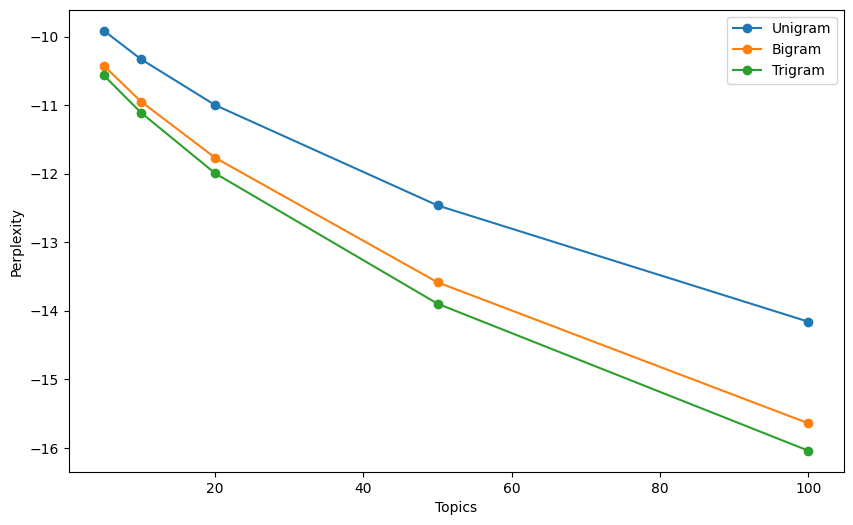

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(best_uni['Topics'], best_uni['Perplexity'], label="Unigram", marker='o')
plt.plot(best_bi['Topics'], best_bi['Perplexity'], label="Bigram", marker='o')
plt.plot(best_tri['Topics'], best_tri['Perplexity'], label="Trigram", marker='o')

# Set labels and title
plt.xlabel('Topics')
plt.ylabel('Perplexity')
plt.legend()
plt.show()

Selection of best parameters

In [ ]:
l = [sum(best_uni['Perplexity']), sum(best_bi['Perplexity']), sum(best_tri['Perplexity'])]
best = l.index(min(l))
if best == 0:
  alpha = best_uni.iloc[0,1]
  beta = best_uni.iloc[0,2]
  corp = corpus_uni_traval
  dic = id2word_uni
elif best ==1:
  alpha = best_bi.iloc[0,1]
  beta = best_bi.iloc[0,2]
  corp = corpus_bi_traval
  dic = id2word_bi
else:
  alpha = best_tri.iloc[0,1]
  beta = best_tri.iloc[0,2]
  corp = corpus_tri_traval
  dic = id2word_tri

## HyperParameter parte 2

### Search for better topic number

Coherence

In [ ]:
# supporting function
def compute_choerence(corpus, dictionary, k, a, b):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k,
                                           random_state=777,
                                           alpha=a,
                                           eta=b)
    coherence_model_lda = CoherenceModel(model=lda_model, corpus = corpus, coherence='u_mass')
    return coherence_model_lda.get_coherence()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Topics range
t1 = range(5, 101, 5)
t2 = range(200, 1001, 100)
topics_range = chain(t1, t2)

model_results = {'Topics': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(topics_range)))

    # iterate through number of topics
    for k in topics_range:
      # get the coherence score for the given parameters
      cv = compute_choerence(corpus=corp, dictionary=dic,
                                    k=k, a=alpha, b=beta)
      # Save the model results
      model_results['Topics'].append(k)
      model_results['Coherence'].append(cv)

      pbar.update(1)
    pbar.close()

Save

In [ ]:
model_results.to_csv('/content/drive/MyDrive/Text mining project/Topic modeling/Final_results/coherence_result', index=False)

Read

In [ ]:
model_results = pd.read_csv('/content/drive/MyDrive/TM/Text mining project/Topic modeling/Final_results/coherence_result')

In [ ]:
result = pd.DataFrame(model_results)

### Visualization for selecting the best topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


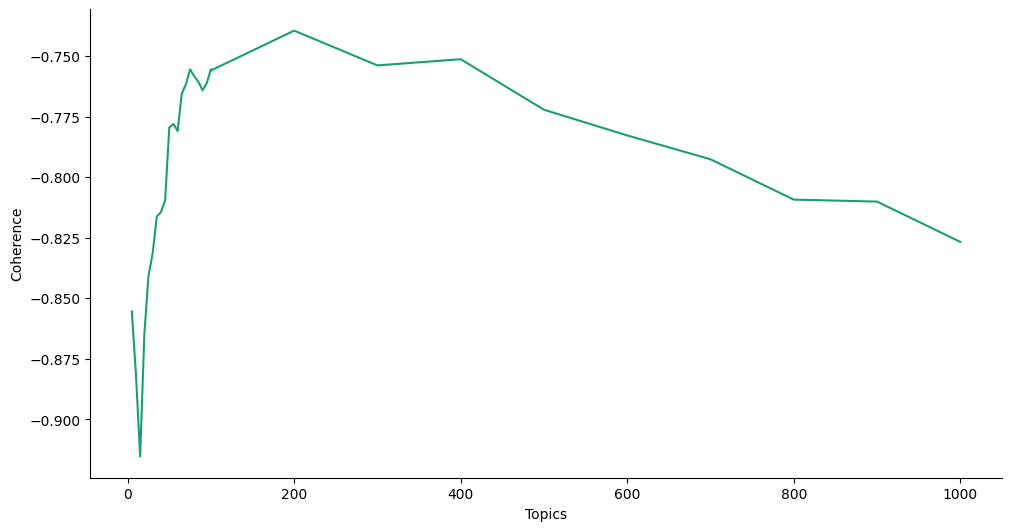

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Topics']
  ys = series['Coherence']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = result.sort_values('Topics', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Topics')
_ = plt.ylabel('Coherence')

In [ ]:
topic_n = result.loc[df['Coherence'].idxmax()]['Topics']

# Final analysis and visualization

In [ ]:
# number of topics
num_topics = 200
# Build LDA model
a = 0.9099999999999999
b = 0.01

lda_model = gensim.models.LdaMulticore(corpus=corpus_tri,
                                       id2word=id2word_tri,
                                       num_topics=num_topics,
                                       random_state=777,
                                       alpha=a,
                                       eta=b)
doc_lda = lda_model[corpus_tri]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Visualization on all topics

In [ ]:
LDAvis_prepared = gensimvis.prepare(lda_model, corpus_tri, id2word_tri)
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
25     0.006212  0.005780       1        1  0.612099
88     0.001278 -0.000768       2        1  0.591502
8      0.009091  0.001967       3        1  0.584548
77     0.000536  0.006681       4        1  0.580976
110    0.004168 -0.002690       5        1  0.579009
...         ...       ...     ...      ...       ...
16    -0.002772 -0.000272     196        1  0.459898
127   -0.005854  0.000450     197        1  0.459358
43    -0.000809 -0.002033     198        1  0.458542
45    -0.002772  0.000315     199        1  0.455613
117   -0.002507  0.000168     200        1  0.454849

[200 rows x 5 columns], topic_info=        Term           Freq          Total  Category  logprob  loglift
139      say  123686.000000  123686.000000   Default  30.0000  30.0000
613     tell   23853.000000   23853.000000   Default  29.0000  29.0000
385     year   37674.000000   3

In [ ]:
LDAvis_prepared = gensimvis.prepare(lda_model, corpus_tri, id2word_tri)
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
25     0.006212  0.005780       1        1  0.612062
88     0.001278 -0.000768       2        1  0.591509
8      0.009091  0.001967       3        1  0.584545
77     0.000536  0.006681       4        1  0.580944
110    0.004168 -0.002690       5        1  0.578926
...         ...       ...     ...      ...       ...
16    -0.002772 -0.000272     196        1  0.459882
127   -0.005854  0.000450     197        1  0.459330
43    -0.000809 -0.002033     198        1  0.458551
45    -0.002772  0.000315     199        1  0.455638
117   -0.002507  0.000168     200        1  0.454854

[200 rows x 5 columns], topic_info=        Term           Freq          Total  Category  logprob  loglift
139      say  123686.000000  123686.000000   Default  30.0000  30.0000
613     tell   23853.000000   23853.000000   Default  29.0000  29.0000
385     year   37674.000000   37674.000000   Default  28.0000  28.0000
90      make   29564.000000   29564.000000   Default  27.0000  27.0000
64        go   28885.000000   28885.000000   Default  26.0000  26.0000
...      ...            ...            ...       ...      ...      ...
41       day      85.364661   20737.526476  Topic200  -5.7001  -0.0998
473   report      66.486869   12827.423339  Topic200  -5.9501   0.1306
1835  police      75.318164   19008.176956  Topic200  -5.8254  -0.1380
170     well      68.460038   14484.534582  Topic200  -5.9208   0.0384
28      come      71.399635   19577.909070  Topic200  -5.8788  -0.2209

[13650 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
23164     37  0.162667  aaron
23164     70  0.054222  aaron
23164    136  0.054222  aaron
23164    167  0.054222  aaron
23164    189  0.054222  aaron
...      ...       ...    ...
15533    113  0.161799    zoe
15533    125  0.023114    zoe
15533    158  0.023114    zoe
15533    161  0.069342    zoe
15533    176  0.023114    zoe

[87197 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[26, 89, 9, 78, 111, 179, 141, 182, 157, 151, 131, 20, 143, 56, 197, 96, 198, 144, 123, 38, 102, 7, 30, 171, 22, 125, 100, 122, 66, 53, 189, 79, 47, 15, 145, 164, 16, 107, 86, 70, 192, 95, 196, 13, 150, 39, 55, 121, 162, 90, 195, 153, 115, 83, 142, 10, 167, 14, 40, 168, 59, 34, 174, 23, 68, 1, 183, 72, 105, 76, 147, 194, 82, 58, 134, 6, 178, 35, 108, 120, 99, 154, 193, 21, 87, 106, 165, 103, 12, 51, 139, 158, 62, 127, 28, 63, 185, 172, 29, 80, 18, 181, 166, 64, 112, 170, 188, 97, 199, 91, 81, 88, 190, 101, 73, 175, 169, 130, 177, 117, 57, 94, 129, 42, 3, 50, 92, 67, 19, 37, 149, 132, 2, 140, 61, 124, 104, 180, 136, 11, 25, 71, 65, 126, 148, 186, 116, 31, 119, 75, 137, 114, 200, 36, 155, 27, 5, 110, 109, 191, 133, 113, 98, 69, 187, 135, 184, 43, 52, 146, 152, 85, 173, 138, 24, 156, 41, 33, 176, 160, 77, 163, 60, 84, 49, 54, 48, 45, 93, 159, 74, 8, 4, 32, 161, 17, 128, 44, 46, 118])